In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [370]:
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.v = None
        self.v_value = None
        
    
    def fit(self, X):
        self.mean = np.mean(X, axis = 0)
        X = X - self.mean
        
        # co-varinace
        cov = np.cov(X.T)
        
        # eigen valuee, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        eigenvectors = eigenvectors.T
        
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.v = eigenvectors
       
        
        # store first n eigen vector
        self.components = eigenvectors[0:self.n_components]
    
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)


In [371]:
iris = pd.read_csv("IRIS.csv")

In [372]:
iris.shape

(150, 5)

In [373]:
X = iris.iloc[:,:-1]

In [374]:
Y = iris.iloc[:,-1]

In [375]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(Y)

In [376]:
pca = PCA(2)
pca.fit(X)

In [377]:
x_tranform = pca.transform(X)

In [378]:
print("Shape of X ",X.shape)
print("Shape of transformed X", x_tranform .shape)

Shape of X  (150, 4)
Shape of transformed X (150, 2)


In [379]:
x1 = x_tranform[:, 0]
x2 = x_tranform[:, 1]


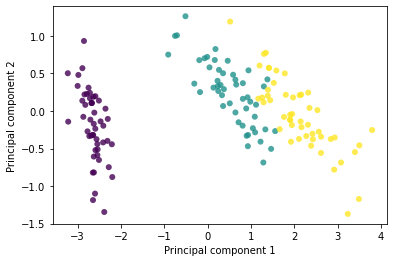

In [380]:
plt.scatter(x1,x2,
            c = y, edgecolor = 'none', alpha = 0.8,
            cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel("Principal component 1",)
plt.ylabel("Principal component 2",)
plt.show()